# 1. Introduction
The United States national debt has evolved significantly over the past decades, shaped by economic cycles, geopolitical events, fiscal policies, and unexpected global crises. Analyzing long-term debt trends provides valuable insights into the sustainability of government financing and the potential economic challenges ahead. This project examines 65 years of historical US debt data, beginning in 1940, to understand how the debt has grown over time and to forecast its trajectory through the year 2040.

Using time-series forecasting techniques—specifically the Prophet model—this study aims to produce a data-driven prediction of future debt levels based on historical patterns. By visualizing both the historical data and the projected values, the analysis highlights long-term trends that can support economic research, financial planning, and informed public discussion. The resulting forecast offers a clear picture of where US debt may be heading if historical dynamics continue, serving as an important reference for policymakers, analysts, and anyone interested in the future of the US economy.

# 2. Us Debt Prediction Until 2040

C:\Users\admin\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


          ds       y
0 1940-01-01   50696
1 1941-01-01   57531
2 1942-01-01   79200
3 1943-01-01  142648
4 1944-01-01  204079
Total rows: 85


08:26:59 - cmdstanpy - INFO - Chain [1] start processing
08:27:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\admin\AppData\Roaming\Python\Python314\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


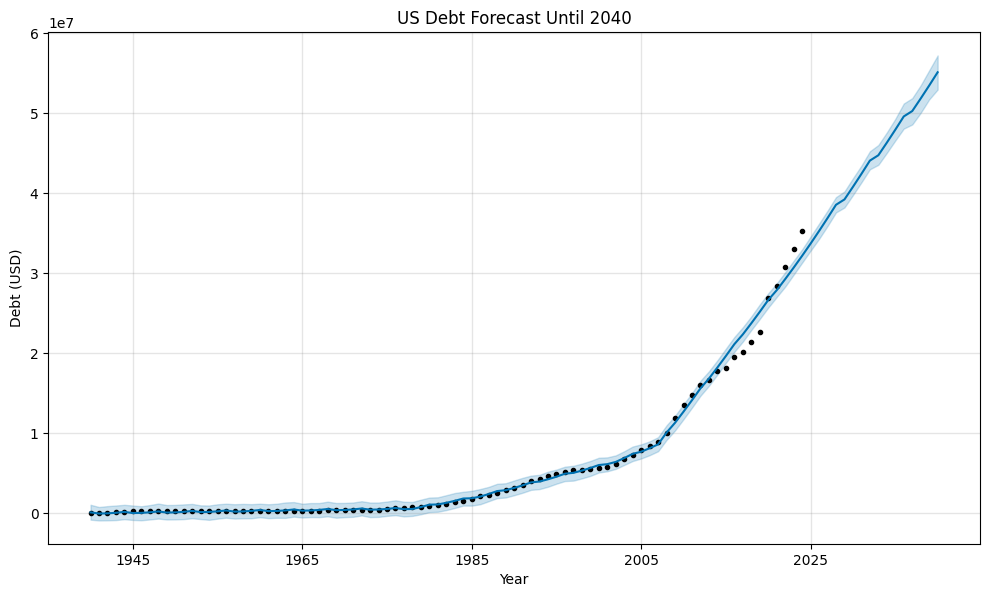

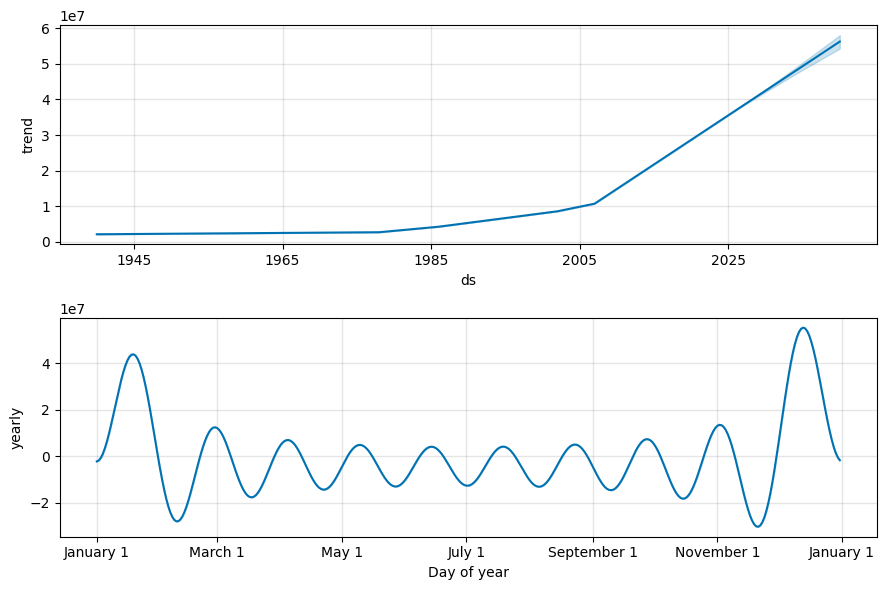

            ds          yhat    yhat_lower    yhat_upper
86  2025-12-31  3.526812e+07  3.428522e+07  3.619018e+07
87  2026-12-31  3.688391e+07  3.588950e+07  3.780556e+07
88  2027-12-31  3.854521e+07  3.759057e+07  3.950125e+07
89  2028-12-31  3.921632e+07  3.820779e+07  4.021693e+07
90  2029-12-31  4.078635e+07  3.975396e+07  4.185692e+07
91  2030-12-31  4.240214e+07  4.134309e+07  4.343425e+07
92  2031-12-31  4.406344e+07  4.297949e+07  4.522988e+07
93  2032-12-31  4.473455e+07  4.353999e+07  4.601439e+07
94  2033-12-31  4.630458e+07  4.502565e+07  4.757855e+07
95  2034-12-31  4.792037e+07  4.656994e+07  4.927041e+07
96  2035-12-31  4.958167e+07  4.806023e+07  5.119388e+07
97  2036-12-31  5.025278e+07  4.857681e+07  5.186856e+07
98  2037-12-31  5.182281e+07  5.003363e+07  5.346869e+07
99  2038-12-31  5.343860e+07  5.170562e+07  5.533851e+07
100 2039-12-31  5.509989e+07  5.293871e+07  5.720354e+07


In [1]:
# -----------------------------
# 1) Import libraries
# -----------------------------
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# -----------------------------
# 2) Load Excel file
# -----------------------------
df = pd.read_excel(r"C:\Users\admin\OneDrive\Documents\data files\Economy\Predictive\us_debt.xlsx")

# -----------------------------
# 3) Prepare dataframe for Prophet
# -----------------------------
df = df.rename(columns={"Year": "ds", "Debt": "y"})
df["ds"] = pd.to_datetime(df["ds"], errors="coerce")
df["y"] = pd.to_numeric(df["y"], errors="coerce")

df = df.dropna(subset=["ds", "y"])
df = df.drop_duplicates(subset=["ds"]).sort_values("ds").reset_index(drop=True)

print(df.head())
print("Total rows:", len(df))

# -----------------------------
# 4) Fit Prophet model
# -----------------------------
model = Prophet()
model.fit(df)

# -----------------------------
# 5) Forecast until 2040
# -----------------------------
last_year = df["ds"].dt.year.max()
years_to_2040 = 2040 - last_year

if years_to_2040 < 1:
    years_to_2040 = 1  # ensure at least one year

future = model.make_future_dataframe(periods=years_to_2040, freq='Y')
forecast = model.predict(future)

# -----------------------------
# 6) Plot forecast
# -----------------------------
fig1 = model.plot(forecast)
plt.title("US Debt Forecast Until 2040")
plt.xlabel("Year")
plt.ylabel("Debt (USD)")
plt.show()

# -----------------------------
# 7) Plot components
# -----------------------------
fig2 = model.plot_components(forecast)
plt.show()

# -----------------------------
# 8) Show predicted values until 2040
# -----------------------------
forecast_2040 = forecast[forecast["ds"].dt.year >= (last_year + 1)][["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(forecast_2040)
